In [1]:
import pandas as pd
import matplotlib as mplot

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_columns = 25
pd.options.display.max_rows = 10

### Arquivos extraídos do Microdados INEP

In [4]:
file_resp = '../dados/TS_ITEM.csv'
file_alunos_3EM_ESC = '../dados/TS_ALUNO_3EM_ESC.csv'
# file_alunos_3EM_AG = '../dados/TS_ALUNO_3EM_AG.csv'
file_alunos_9EF = '../dados/TS_ALUNO_9EF.csv'
file_alunos_5EF = '../dados/TS_ALUNO_5EF.csv'

### Conjunto Definido de Colunas à Serem Utilizadas

In [5]:
RESPOSTAS_INVALIDAS = ['X', '.', '*', ' ', '']

##### Identificadores das Colunas

In [6]:
ID_SERIE = 'ID_SERIE'
TIPO_PROVA = 'TIPO_PROVA'
DISCIPLINA = 'DISCIPLINA'
ID_SERIE_ITEM = 'ID_SERIE_ITEM'
ID_BLOCO = 'ID_BLOCO'
ID_POSICAO = 'ID_POSICAO'
GABARITO = 'GABARITO'
ID_PROVA_BRASIL = 'ID_PROVA_BRASIL' # Ano da Prova, pode ser ignorado, pois os arquivos são baixados por ano
ID_UF = 'ID_UF'
ID_MUNICIPIO = 'ID_MUNICIPIO'

##### Preenchimento Prova

In [7]:
ID_ALUNO = 'ID_ALUNO'
IN_PREENCHIMENTO_PROVA = 'IN_PREENCHIMENTO_PROVA'
IN_PRESENCA_PROVA = 'IN_PRESENCA_PROVA'
ID_REGIAO = 'ID_REGIAO'
ID_AREA = 'ID_AREA'

##### Respostas da Prova

In [8]:
ID_BLOCO_1 = 'ID_BLOCO_1'
ID_BLOCO_2 = 'ID_BLOCO_2'
TX_RESP_BLOCO_1_LP = 'TX_RESP_BLOCO_1_LP'
TX_RESP_BLOCO_2_LP = 'TX_RESP_BLOCO_2_LP'
TX_RESP_BLOCO_1_MT = 'TX_RESP_BLOCO_1_MT'
TX_RESP_BLOCO_2_MT = 'TX_RESP_BLOCO_2_MT'

##### Proeficiência do ALuno

In [9]:
PESO_ALUNO_LP = 'PESO_ALUNO_LP'
PESO_ALUNO_MT = 'PESO_ALUNO_MT'
PROFICIENCIA_LP = 'PROFICIENCIA_LP'
ERRO_PADRAO_LP = 'ERRO_PADRAO_LP'
PROFICIENCIA_LP_SAEB = 'PROFICIENCIA_LP_SAEB'
ERRO_PADRAO_LP_SAEB = 'ERRO_PADRAO_LP_SAEB'
PROFICIENCIA_MT = 'PROFICIENCIA_MT'
ERRO_PADRAO_MT = 'ERRO_PADRAO_MT'
PROFICIENCIA_MT_SAEB = 'PROFICIENCIA_MT_SAEB'
ERRO_PADRAO_MT_SAEB = 'ERRO_PADRAO_MT_SAEB'

##### Questionário Socioeconômico

In [10]:
IN_PREENCHIMENTO_QUESTIONARIO = 'IN_PREENCHIMENTO_QUESTIONARIO'
TX_RESP_Q001 = 'TX_RESP_Q001' # Sexo
TX_RESP_Q002 = 'TX_RESP_Q002' # Cor/Raça

In [11]:
colunas_resp = [
    ID_SERIE, TIPO_PROVA, DISCIPLINA,
    ID_SERIE_ITEM, ID_BLOCO, ID_POSICAO,
    GABARITO
]

In [12]:
colunas_aluno = [
    ID_UF, ID_MUNICIPIO, ID_REGIAO, ID_AREA,
    ID_SERIE, IN_PREENCHIMENTO_PROVA,
    ID_BLOCO_1, ID_BLOCO_2,
    TX_RESP_BLOCO_1_LP, TX_RESP_BLOCO_2_LP,
    TX_RESP_BLOCO_1_MT, TX_RESP_BLOCO_2_MT,
    PROFICIENCIA_LP,
    PROFICIENCIA_MT,
    TX_RESP_Q001,
    TX_RESP_Q002
]

### Arquivos

#### Gabarito, 666 itens corrigidos (+36KB)

#### 5SEM,     2.624.019 provas (+360MB)
#### 9SEM,     2.341.459 provas (+321MB)
#### 3SEMAG,   1.966.507 provas (+270MB)
###### 3SEMESC,  1.456.325 provas (+200MB)

In [13]:
df_gabarito = pd.read_csv(
    file_resp,
    delimiter=';', encoding='iso-8859-1',
    usecols=colunas_resp,
    # low_memory=True
)

In [14]:
df_gabarito.sample(10)

,ID_SERIE,TIPO_PROVA,DISCIPLINA,ID_SERIE_ITEM,ID_BLOCO,ID_POSICAO,GABARITO
440,9,Prova Regular,LP,5,1,9,D
649,9,Macrotipo 18 e 24,MT,5,1,8,B
341,5,Prova Regular,MT,5,1,9,B
50,3,Prova Regular,LP,3,4,12,B
195,3,Prova Regular,MT,3,7,1,D
311,5,Macrotipo 18 e 24,LP,5,2,2,B
495,9,Prova Regular,LP,9,5,12,A
14,3,Prova Regular,LP,3,2,2,B
18,3,Prova Regular,LP,3,2,6,C
660,9,Macrotipo 18 e 24,MT,5,2,8,B


In [15]:
df_gabarito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 7 columns):
ID_SERIE         666 non-null int64
TIPO_PROVA       666 non-null object
DISCIPLINA       666 non-null object
ID_SERIE_ITEM    666 non-null int64
ID_BLOCO         666 non-null int64
ID_POSICAO       666 non-null int64
GABARITO         666 non-null object
dtypes: int64(4), object(3)
memory usage: 36.5+ KB


Geralmente 15 segundos para carregar o conjunto de dados selecionado

In [16]:
df_aluno_5EF = pd.read_csv(
    file_alunos_5EF,
    delimiter=',', encoding='iso-8859-1',
    usecols=colunas_aluno,
    low_memory=True, 
    # nrows=20000  # Para fazer testes com os dados
)

In [17]:
df_aluno_9EF = pd.read_csv(
    file_alunos_9EF,
    delimiter=',', encoding='iso-8859-1',
    usecols=colunas_aluno,
    low_memory=True,
    # nrows=20000  # Para fazer testes com os dados
)

In [18]:
# df_aluno_3EM_AG = pd.read_csv(
#     file_alunos_3EM_AG,
#     delimiter=',', encoding='iso-8859-1',
#     usecols=colunas_aluno,
#     low_memory=True, 
# )

In [19]:
df_aluno_3EM = pd.read_csv(
    file_alunos_3EM_ESC,
    delimiter=',', encoding='iso-8859-1',
    usecols=colunas_aluno,
    low_memory=True,
    # nrows=20000  # Para fazer testes com os dados
)

In [20]:
df_aluno_5EF.sample(10)

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_SERIE,IN_PREENCHIMENTO_PROVA,ID_BLOCO_1,ID_BLOCO_2,TX_RESP_BLOCO_1_LP,TX_RESP_BLOCO_2_LP,TX_RESP_BLOCO_1_MT,TX_RESP_BLOCO_2_MT,PROFICIENCIA_LP,PROFICIENCIA_MT,TX_RESP_Q001,TX_RESP_Q002
155,1,11,1100015,2,5,1,2,4,DAADAABBDCD,BCCBCDBDDAC,BABADACCACB,BDDAADCAACC,-0.660057,-1.166175,B,A
7724,1,11,1100122,2,5,1,7,3,BBDCADBADCD,DDCDBCACACA,CCADBDBDCCB,CAACABBCBAC,0.349215,1.269552,B,A
16302,1,11,1100205,1,5,1,3,5,DACDBAACACA,DAACDDBDDBD,CBADBCCCBCB,BCBCBACADAC,-0.277990,-1.207264,B,C
946,1,11,1100023,2,5,1,5,7,DDACDACDDBD,BBDCADBABAB,ABDCDACCCCA,CCBDBCBDCBD,0.698575,0.699789,B,C
1951,1,11,1100023,2,5,1,2,5,DAABACABAAA,ABACDAAAABA,BBAAAABCBBB,ABBCDDDADAC,-1.447601,-0.492413,A,A
1358,1,11,1100023,2,5,1,7,2,BBCDBAADDCB,DACCBCCAADD,CDBBBDBDDCC,BDABCADCCBB,-1.876471,-0.913368,A,C
12828,1,11,1100205,1,5,1,4,5,BCCBAADDDAB,DDBCDCCCCCC,ABCBADCCDCC,CDBCADCDDBC,-0.586179,-2.058148,NaN,B
14194,1,11,1100205,1,5,1,4,6,ABCCAABBBAD,BDACBBAACBC,BCACACBDABB,CCABDBDDBCB,-0.524108,0.053520,B,C
16742,1,11,1100205,1,5,1,4,7,BCCCABBDDDD,BDDAADCBABD,BDABBADDDBC,CDACBBBCCAD,-1.366217,-0.921597,B,C
16144,1,11,1100205,1,5,1,2,4,DAABDABBBCA,DACBAABDDAC,BABAACACDAC,BDABAABCDBD,-0.556177,-0.956211,A,A


In [21]:
df_aluno_9EF.sample(10)

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_SERIE,IN_PREENCHIMENTO_PROVA,ID_BLOCO_1,ID_BLOCO_2,TX_RESP_BLOCO_1_LP,TX_RESP_BLOCO_2_LP,TX_RESP_BLOCO_1_MT,TX_RESP_BLOCO_2_MT,PROFICIENCIA_LP,PROFICIENCIA_MT,TX_RESP_Q001,TX_RESP_Q002
18414,1,11,1100346,2,9,1,5,7,BAACABCDCBBAC,ADBDACBABCABA,CCBDDCDACDCAB,BACDDDDBDABAB,-0.439944,0.279997,A,A
17773,1,11,1100320,2,9,1,3,4,CBCDBACABADCD,ABDDCDBADDBCA,DBCADBBDCCDCB,BACACBCBDBCCA,0.666146,0.352140,A,C
8838,1,11,1100189,2,9,0,3,6,.............,.............,.............,.............,NaN,NaN,NaN,NaN
3220,1,11,1100072,2,9,1,1,3,CDCCADDADCDBC,CBABCACABCCDD,CAABBCBCBAACC,DCBBABBDABCBC,0.239881,-0.427017,B,D
4085,1,11,1100106,2,9,1,7,2,CDBBDBCBBCCCA,CDBCDABDCCBCB,BACDCBDBDABCD,CACAAABDCDACC,-0.269752,-0.375248,B,F
18658,1,11,1100379,2,9,0,4,6,.............,.............,.............,.............,NaN,NaN,NaN,NaN
18335,1,11,1100338,2,9,1,5,1,BCDCBCCACDBAB,CBDDAADADCAAC,CCBDDCDDCDDCB,CBCDDCBDBBDDB,0.527265,0.160411,B,F
14053,1,11,1100205,1,9,0,1,3,.............,.............,.............,.............,NaN,NaN,NaN,NaN
12387,1,11,1100205,1,9,1,5,6,BADCAAACDBBBD,BCBCDCCDCDCBD,CCDACBCBCBCAB,DBBABACBABABA,0.219405,-0.538358,A,C
14165,1,11,1100205,1,9,0,3,5,.............,.............,.............,.............,NaN,NaN,NaN,NaN


In [22]:
df_aluno_3EM.sample(10)

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_SERIE,IN_PREENCHIMENTO_PROVA,ID_BLOCO_1,ID_BLOCO_2,TX_RESP_BLOCO_1_LP,TX_RESP_BLOCO_2_LP,TX_RESP_BLOCO_1_MT,TX_RESP_BLOCO_2_MT,PROFICIENCIA_LP,PROFICIENCIA_MT,TX_RESP_Q001,TX_RESP_Q002
1803,1,11,1100098,2,12,1,4,7,CDEDCDABCAABE,DEBBCDACDCBCC,CECDCCBDDEEEA,AAAAACCADDAAA,0.533312,0.911736,B,C
5079,1,11,1100205,1,12,1,4,6,CDCACCABCEABE,BEDDCCBCBEEBB,CBADCEBCBEADA,DEEBDCBCCCBDA,1.246360,0.296144,B,F
5373,1,11,1100205,1,12,1,2,5,DCAAECDCDABCB,BDBDBADDAEEBB,DCCECEDCCAACB,ACBEDDACDCAAC,0.569081,1.426175,A,C
2758,1,11,1100114,2,12,1,5,7,AABABBDBCABDD,BCBDDABBAEBCD,BAAEABACDCAAA,EAABACCBCDCDD,-1.403110,-0.065034,B,C
2250,1,11,1100106,2,12,1,3,5,ECEBAEDDABEAD,BBECABDDCDEAD,EBABCACCADCAB,BDEECCCCBDDAD,0.687965,0.446701,B,C
943,1,11,1100049,2,12,1,2,5,DEAAECDDDBEBE,BCAEBADDCEAAC,DDCEBADCCABDE,BCBEABDCDBECD,0.939478,1.149964,A,C
12675,1,12,1200203,2,12,1,5,6,CBEDAADDAEAAC,BEBDCABABADBA,ACBEDEDCDCAED,BDCBEABACCBEC,1.597668,2.265754,A,C
254,1,11,1100023,2,12,1,1,4,BAEDCEAABAECD,BECACAABCCDBE,CDAAEADADDBDC,CEBDDEBDBAAEA,1.629295,0.802255,NaN,C
106,1,11,1100015,2,12,1,1,3,CAEECBBBBADBD,ADEBAACDCEEAD,CCBACECBABBCD,EDCDABCBDECAE,0.272882,0.091131,B,C
18996,1,13,1300029,2,12,1,4,5,EBEACCCBCEABA,EAEABAADCBBAB,ABACCBBBAABDA,ABCCDBDCDAEBE,0.066248,-0.405587,A,D


### Após o carregamento, o DataFrame tem suas colunas reorganizadas, logo:

In [23]:
colunas_aluno = list(df_aluno_5EF.columns.values)

### Série

In [24]:
idx_serie_gab = colunas_resp.index(ID_SERIE)
idx_serie_aluno = colunas_aluno.index(ID_SERIE)

### Respostas

In [25]:
idx_disciplina = colunas_resp.index(DISCIPLINA)
idx_posicao_gabarito = colunas_resp.index(ID_POSICAO)
idx_gabarito = colunas_resp.index(GABARITO)
idx_preenchimento_prova = colunas_aluno.index(IN_PREENCHIMENTO_PROVA)

### Blocos

In [26]:
bloco_gab = colunas_resp.index(ID_BLOCO) 
bloco_resp_1 = colunas_aluno.index(ID_BLOCO_1)
bloco_resp_2 = colunas_aluno.index(ID_BLOCO_2)
aluno_resp_bloco_1_lp = colunas_aluno.index(TX_RESP_BLOCO_1_LP) 
aluno_resp_bloco_2_lp = colunas_aluno.index(TX_RESP_BLOCO_2_LP) 
aluno_resp_bloco_1_mt = colunas_aluno.index(TX_RESP_BLOCO_1_MT) 
aluno_resp_bloco_2_mt = colunas_aluno.index(TX_RESP_BLOCO_2_MT) 

### Região de Estudo/Aluno

In [27]:
idx_uf = colunas_aluno.index(ID_UF)
idx_municipio = colunas_aluno.index(ID_MUNICIPIO)
idx_regiao = colunas_aluno.index(ID_REGIAO)
idx_area = colunas_aluno.index(ID_AREA)
idx_sexo = colunas_aluno.index(TX_RESP_Q001)
idx_raca = colunas_aluno.index(TX_RESP_Q002)

## Cálculo de Acertos

### **Numeração dos Estados, Regiões etc..**
_Descrita no Dicionário da ANEB_

In [28]:
num_estados = {
    11: 'RO',
    12: 'AC',
    13: 'AM',
    14: 'RR',
    15: 'PA',
    16: 'AP',
    17: 'TO',
    21: 'MA',
    22: 'PI',
    23: 'CE',
    24: 'RN',
    25: 'PB',
    26: 'PE',
    27: 'AL',
    28: 'SE',
    29: 'BA',
    31: 'MG',
    32: 'ES',
    33: 'RJ',
    35: 'SP',
    41: 'PR',
    42: 'SC',
    43: 'RS',
    50: 'MS',
    51: 'MT',
    52: 'GO',
    53: 'DF'
}

In [29]:
num_regiao = {
    1: 'Norte',
    2: 'Nordeste',
    3: 'Sudeste',
    4: 'Sul',
    5: 'Centro-Oeste'
}

In [30]:
num_cor = {
    'A': 'Branca',
    'B': 'Preta',
    'C': 'Parda',
    'D': 'Amarelo',
    'E': 'Indígena',
    'F': 'Não quero declarar',
}

In [31]:
num_sexo = {
    'A': 'Masculino',
    'B': 'Feminino'
}

In [32]:
filtro_de_colunas_resposta = ['serie', 'nota_lp', 'nota_mt', 'uf', 'municipio', 'regiao', 'area', 'sexo', 'raca']

In [33]:
def filtrar_dados(serie_dados, nao_realizado=0, colunas=filtro_de_colunas_resposta):
    """
    
    :param serie_dados:     Série de dados carregados (DataFrame)
    :param nao_realizado:   Número de ocorrências do Não Preenchimento de Prova
    :param colunas:         Filtro de Colunas à serem aplicadas ao resultado de serie_dados
    :param resposta_dados:  DataFrame de resposta, caso não seja vazio, os dados serão adicionados a ele 
    :return: 
        Dados Filtrado (DataFrame)
        Quantidade não realizada de provas
    """
    resposta_dados = []
    i = 0
    for r in serie_dados.to_numpy():  # [len(serie_dados.to_numpy())//2:]:
        i = i + 1
        not_lim = 100000
        if 0 == i % not_lim:
            print(f'iter {not_lim}, resp: {len(resposta_dados)}, {nao_realizado} => {len(resposta_dados) + nao_realizado}')
        
        nota_mt = 0
        nota_pt = 0
        
        respostas_lp = [
            [False for x in range(len(r[aluno_resp_bloco_1_lp]))],
            [False for x in range(len(r[aluno_resp_bloco_2_lp]))]
        ]
        respostas_mt = [
            [False for x in range(len(r[aluno_resp_bloco_1_mt]))],
            [False for x in range(len(r[aluno_resp_bloco_2_mt]))]
        ]
        
        # Quem não fez a prova é ignorado
        if not bool(int(r[idx_preenchimento_prova])):
            nao_realizado = nao_realizado + 1
            continue
        serie_aluno = r[idx_serie_aluno]
        if serie_aluno in (12, 13):
            # 12 - 3ª ou 4ª Série do Ensino Médio
            # 13 - 3ª ou 4ª Série do Ensino Médio Integrado
            serie_aluno = 3
        for gab in df_gabarito.to_numpy():
            # if gab['ID_SERIE'] == r['ID_SERIE']:
            if gab[idx_gabarito] not in RESPOSTAS_INVALIDAS:
                if gab[idx_serie_gab] == serie_aluno and\
                        (r[bloco_resp_1] == gab[bloco_gab] or r[bloco_resp_2] == gab[bloco_gab]):
                    is_bloco_1 = r[bloco_resp_1] == gab[bloco_gab]
                    if is_bloco_1 and r[bloco_resp_2] == gab[bloco_gab]:
                        print ('bloco EDGE CASES!!')
                    idx_r = 0 if is_bloco_1 else 1
                    if gab[idx_disciplina] == 'LP':
                        resp_aluno = str(r[aluno_resp_bloco_1_lp if is_bloco_1 else aluno_resp_bloco_2_lp])
                        if (respostas_lp[idx_r])[gab[idx_posicao_gabarito]-1]:
                            continue
                        if resp_aluno[gab[idx_posicao_gabarito]-1] == gab[idx_gabarito]:
                            nota_pt += 1
                            (respostas_lp[idx_r])[gab[idx_posicao_gabarito]-1] = True
                    elif gab[idx_disciplina] == 'MT':
                        resp_aluno = str(r[aluno_resp_bloco_1_mt if is_bloco_1 else aluno_resp_bloco_2_mt])
                        if (respostas_mt[idx_r])[gab[idx_posicao_gabarito]-1]:
                            continue
                        if resp_aluno[gab[idx_posicao_gabarito]-1] == gab[idx_gabarito]:
                            nota_mt += 1
                            (respostas_mt[idx_r])[gab[idx_posicao_gabarito]-1] = True
        if nota_pt or nota_mt:
            resposta_dados.append({
                colunas[0]: serie_aluno,
                colunas[1]: nota_pt,
                colunas[2]: nota_mt,
                colunas[3]: num_estados.get(r[idx_uf], r[idx_uf]),
                colunas[4]: r[idx_municipio],
                colunas[5]: num_regiao.get(r[idx_regiao], r[idx_regiao]),
                colunas[6]: r[idx_area],
                colunas[7]: num_sexo.get(r[idx_sexo], r[idx_sexo]),
                colunas[8]: num_cor.get(r[idx_raca], r[idx_raca])
            })
            # ,
            #     ignore_index=True
            # )
    return resposta_dados, nao_realizado

#### O filtro aplicado demora cerca de 25 minutos cada arquivo 


In [34]:
dados_filtrados = pd.DataFrame(columns=filtro_de_colunas_resposta)

In [35]:
r_filtro, qtd_prova_nao_realizada_5SEM = filtrar_dados(
    df_aluno_5EF, 0,
)

In [36]:
dados_filtrados = dados_filtrados.append(r_filtro, ignore_index=True)

In [37]:
r_filtro, qtd_prova_nao_realizada_9SEM = filtrar_dados(
    df_aluno_9EF, 0,
)

In [38]:
dados_filtrados = dados_filtrados.append(r_filtro, ignore_index=True)

In [39]:
r_filtro, qtd_prova_nao_realizada_3EM = filtrar_dados(
    df_aluno_3EM, 0,
)

In [40]:
dados_filtrados = dados_filtrados.append(r_filtro, ignore_index=True)

In [41]:
dados_filtrados.sample(5)

,serie,nota_lp,nota_mt,uf,municipio,regiao,area,sexo,raca
23991,9,24,21,RO,1100155,Norte,2,Feminino,Parda
30717,9,22,11,RO,1100304,Norte,2,Feminino,Parda
8163,5,14,8,RO,1100155,Norte,2,Feminino,Preta
14134,5,8,10,RO,1100205,Norte,1,Masculino,NaN
25581,9,22,14,RO,1100205,Norte,1,Masculino,Branca


In [42]:
fig_size = (6, 4)

### Médias Com Dois Índices

In [151]:
def conta_tamanho_grupo(grupo, grupo_buscado):
    # print(f'grupo {grupo}, grupo_buscado {grupo_buscado} {type(grupo_buscado)}')
    if not grupo_buscado:
        return 1
    gd = dados_filtrados.groupby(grupo).size()
    i = False
    p = False
    if isinstance(grupo, (list, tuple)):
        gd = gd.unstack()
        cv = list(gd.columns.values)
        if isinstance(grupo_buscado, (list, tuple)):
            for g in grupo_buscado:
                if g in cv:
                    i = cv.index(g)
                    p = grupo_buscado[0]
        else:
            print('gb', grupo_buscado)
    else:
        i = gd.index.contains(grupo_buscado)
    if p:
        return gd.unstack().xs((grupo_buscado[-1], p))
    if i:
        return gd[grupo_buscado]
    print(f'nao encontrado {grupo_buscado} em {i}')
    return 1

## Estudo Proposto

#### Contagem de Provas por Estado

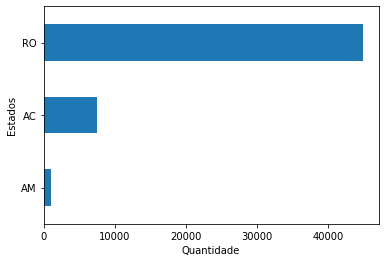

In [44]:
ax = dados_filtrados.groupby('uf').size().sort_values().plot.barh(
    figsize=fig_size
)
ax.set_xlabel('Quantidade')
ax = ax.set_ylabel('Estados')

#  TO-DO

In [45]:
print(
    f'Foram aplicadas um Total de {len(dados_filtrados)} provas em todo país.\n\r\
    {qtd_prova_nao_realizada_5SEM} alunos da 5ª série do Ensino Fundamental Não Participaram\n\r\
    {qtd_prova_nao_realizada_9SEM} alunos da 9ª série do Ensino Fundamental Não Estavam Presentes\n\r\
    {qtd_prova_nao_realizada_3EM} alunos do 3ª ano do Ensino Médio Não Fizeram a Prova'
)

Foram aplicadas um Total de 53327 provas em todo país.
    2668 alunos da 5ª série do Ensino Fundamental Não Participaram
    3999 alunos da 9ª série do Ensino Fundamental Não Estavam Presentes
    0 alunos do 3ª ano do Ensino Médio Não Fizeram a Prova


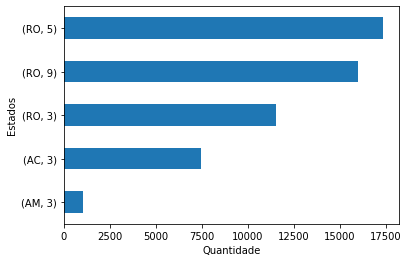

In [71]:
ax = dados_filtrados.groupby(['uf', 'serie']).size().sort_values().plot(
    kind='barh',
    figsize=fig_size
)
ax.set_xlabel('Quantidade')
ax = ax.set_ylabel('Estados')

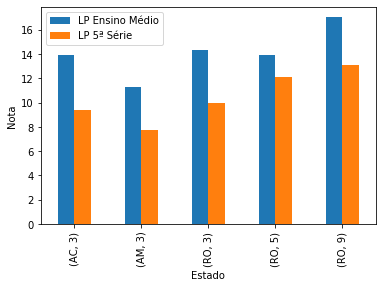

In [152]:
ax = dados_filtrados.groupby(['uf', 'serie'])[['nota_lp', 'nota_mt']].sum()\
.sort_values(by=['uf', 'serie'])\
.apply(
    lambda x: x / conta_tamanho_grupo(['uf', 'serie'], x.name), axis=1
)
ax = ax.plot(
    kind='bar',
    figsize=fig_size
)
ax.legend([
    'LP Ensino Médio', 'LP 5ª Série', 'LP 9ª Série',
    'MT Ensino Médio', 'MT 5ª Série', 'MT 9ª Série'
]
    , frameon=True
    , loc='best'
)
ax.set_ylabel('Nota')
ax = ax.set_xlabel('Estado, Série')

### Média de Nota Disposta sobre os Estados

#### Médias Por Região

c:\users\guilhermegomesdossan\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


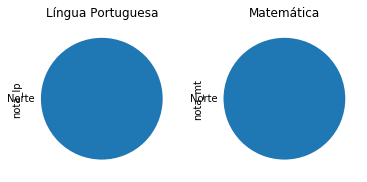

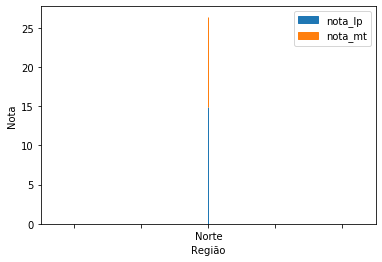

In [49]:
ax = dados_filtrados.groupby('regiao').sum()[['nota_lp', 'nota_mt']].apply(
    lambda x: x / conta_tamanho_grupo('regiao', x.name), axis=1
)

ax.plot.pie(
    subplots=True, figsize=fig_size,
    legend=False,
    title=['Língua Portuguesa', 'Matemática']
)

ax = ax.plot(
    kind='area',
    stacked=True
)
ax.set_ylabel('Nota')
ax = ax.set_xlabel('Região')


#### Por Estados

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CBADC7E10>,
      dtype=object)

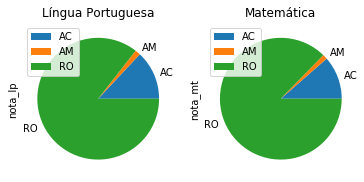

In [50]:
ax = dados_filtrados.groupby('uf').sum()[['nota_lp', 'nota_mt']].apply(
    lambda x: x / len(dados_filtrados)
).plot.pie(
    subplots=True, figsize=fig_size,
    title=['Língua Portuguesa', 'Matemática']
)

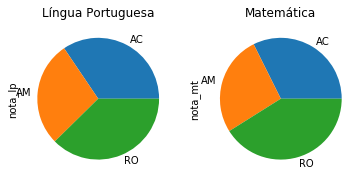

In [182]:
ax = dados_filtrados.groupby('uf').sum()[['nota_lp', 'nota_mt']].apply(
    lambda x: x / conta_tamanho_grupo('uf', x.name), axis=1
).plot.pie(
    subplots=True, figsize=fig_size,
    legend=False, title=['Língua Portuguesa', 'Matemática']
)

### Disparidades Entre Aprendizagem

### Média Geral de Notas

nota_lp    14.912052
nota_mt    11.493296
dtype: float64


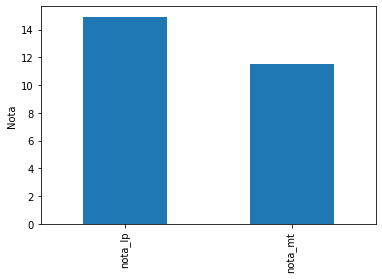

In [52]:
ax = dados_filtrados[['nota_lp', 'nota_mt']].mean()
print(ax)
ax = ax.plot(kind='bar')
ax = ax.set_ylabel('Nota')

### Por Gênero

           Língua Portuguesa  Matemática
sexo                                    
Feminino           15.507351   11.134921
Masculino          14.383306   12.000824


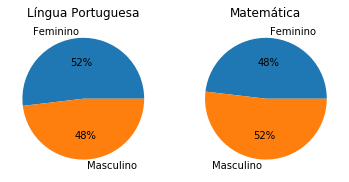

In [53]:
ax = dados_filtrados.groupby('sexo').sum()[['nota_lp', 'nota_mt']].apply(
    lambda x: x / conta_tamanho_grupo('sexo', x.name), axis=1
)
ax.columns = ['Língua Portuguesa', 'Matemática']
print(ax)
ax.columns = [None, None]
pl = ax.plot.pie(
    subplots=True, figsize=fig_size,
    autopct='%.0f%%',
    # labels=['Masculino', 'Feminino'],
    legend=False,
    title=['Língua Portuguesa', 'Matemática']
)


### Por Gênero e Estado

#### Língua Portguesa

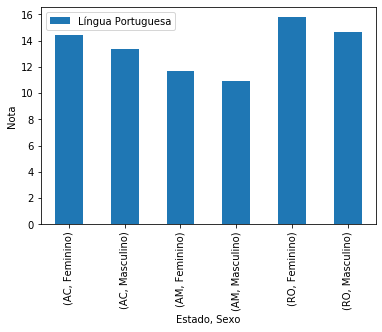

In [185]:
ax = dados_filtrados.groupby(['uf', 'sexo'])[['nota_lp']].sum()\
.sort_values(by=['uf', 'sexo'])\
.apply(
    lambda x: x / conta_tamanho_grupo(['uf', 'sexo'], x.name), axis=1
).plot(
    kind='bar', stacked=False,
    figsize=fig_size
)
ax.legend(
    ['Língua Portuguesa'],
    loc='best'
)

ax.set_ylabel('Nota')
ax = ax.set_xlabel('Estado, Sexo')

#### Matemática

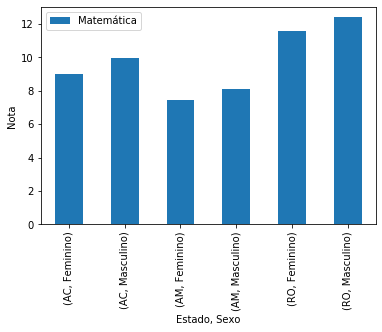

In [179]:
ax = dados_filtrados.groupby(['uf', 'sexo'])[['nota_mt']].sum()\
.sort_values(by=['uf', 'sexo'])\
.apply(
    lambda x: x / conta_tamanho_grupo(['uf', 'sexo'], x.name), axis=1
).plot(
    kind='bar', stacked=False,
    figsize=fig_size
)
ax.legend(
    ['Matemática'],
    loc='best'
)

ax.set_ylabel('Nota')
ax = ax.set_xlabel('Estado, Sexo')

### Por Raça

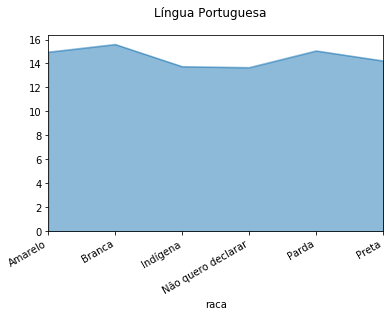

In [219]:
ax = dados_filtrados.groupby('raca')[['nota_lp']].sum()\
.sort_values(by='raca')\
.apply(
    lambda x: x / conta_tamanho_grupo('raca', x.name), axis=1
).plot(
    kind='area', stacked=False,
    figsize=fig_size, legend=False,
    subplots=True, title='Língua Portuguesa'
)

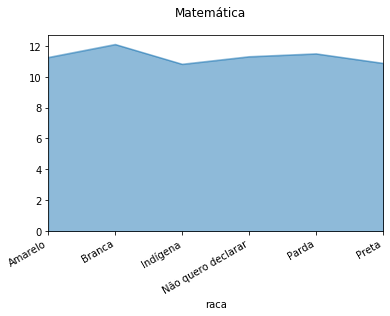

In [214]:
ax = dados_filtrados.groupby('raca')[['nota_mt']].sum()\
.sort_values(by='raca')\
.apply(
    lambda x: x / conta_tamanho_grupo('raca', x.name), axis=1
).plot(
    kind='area', stacked=False,
    figsize=fig_size, legend=False,
    subplots=True, title='Matemática'
)